<a href="https://colab.research.google.com/github/armandovl/youtube/blob/main/diagrama_barras_videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importar las librerías de cajón
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importamos el data frame
titanic=sns.load_dataset("titanic")
titanic.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [3]:
a=titanic.embarked.value_counts()
print(a)
print(a.index)

S    644
C    168
Q     77
Name: embarked, dtype: int64
Index(['S', 'C', 'Q'], dtype='object')


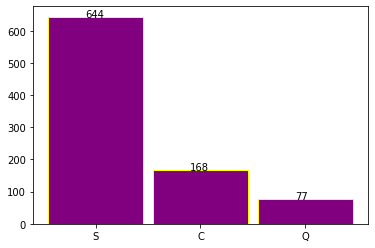

In [4]:
x=a.index
y=a
plt.bar(x,y,
        width= 0.9, align='center',color='purple', edgecolor = 'yellow')

# Agregar los valores
for i in range(len(x)):
    plt.annotate(y[i], (-0.1 + i, y[i]))

In [6]:
#parametros especiales
# figsize = (12,7): Ayuda a establecer la altura y el ancho de la parcela. Pero un giro es el orden que se intercambia, que es (ancho, alto) o (y, x).
# width= 0.9: Ayuda a establecer el ancho de las barras.
# color = ‘cyan’: Ayuda a establecer el color de las barras.
# edgecolor = ‘red’: Ayuda a establecer el color del borde de las barras.
# annotate = (‘text’, (x, y)): Ayuda a anotar las barras, incluir el texto o la cadena junto con la ubicación deseada como coordenadas xey.
# legend(labels = [‘Text’]): Ayuda a configurar una etiqueta para el diagrama de barras.
# title(‘Text’): Ayuda a proporcionar un título para el diagrama de barras
# xlabel(‘Text’), ylabel(‘Text’): Ayuda a proporcionar el nombre de los ejes xey del gráfico.
# savefig(‘Path’): Ayuda a guardar la trama en su máquina local o en cualquier lugar. Puede guardar en diferentes formatos como “ PNG ”, “ JPEG ”, etc.

In [7]:
#tablas multidimensionales
#tablas de frecuencia cruzadas agrupadas

#Las variables tienen que que ser categóricas

def tablas_frecuencia(variablefila,listaVariablesColumnas):
  
  import pandas as pd #importamos la biblioteca de pandas por si acaso no lo hemos hecho
  
  #creamos la tabla con las columnas que queremos graficar
  tab_10=pd.crosstab( 
        index=variablefila, #variable para las filas
        columns=listaVariablesColumnas, #variables para las columnas
        margins=True #que ponga los totales como "All"            
                      )
  #cambiar nombres de los totales
  tab_10 = tab_10.rename(columns = {"All":"total_filas"})
  tab_10 = tab_10.rename(index = {"All":"total_columnas"})

  frecuencia_absoluta=tab_10 #colocamos nuestra trabla 10 (frecuencias absolutas ) en la variable frecuencia_absoluta


  ####################################  frecuencias relativas marginales ############################

  tab_11=tab_10/tab_10.loc["total_columnas"]*100
  frecuencia_relativa_marginal_columna=tab_11.round(1)

  tab_12=tab_10.T/tab_10["total_filas"]*100
  frecuencia_relativa_marginal_fila=tab_12.T.round(1)

  ########   A ############### B ################################### C #########################
  return frecuencia_absoluta,frecuencia_relativa_marginal_columna,frecuencia_relativa_marginal_fila

In [8]:
g1,g2,g3=tablas_frecuencia(titanic.survived,[titanic.sex,titanic.pclass])

In [9]:
g1

sex            female          male           total_filas
pclass              1   2    3    1    2    3            
survived                                                 
0                   3   6   72   77   91  300         549
1                  91  70   72   45   17   47         342
total_columnas     94  76  144  122  108  347         891

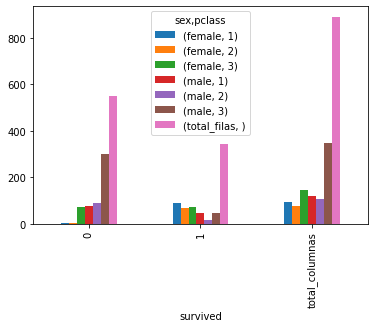

In [10]:
#con pandas.plot https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=kind
g1.plot(kind="bar")

In [11]:
g1=g1.drop(["total_columnas"],axis=0)
g1=g1.drop(["total_filas"],axis=1)
g1

sex      female         male         
pclass        1   2   3    1   2    3
survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47

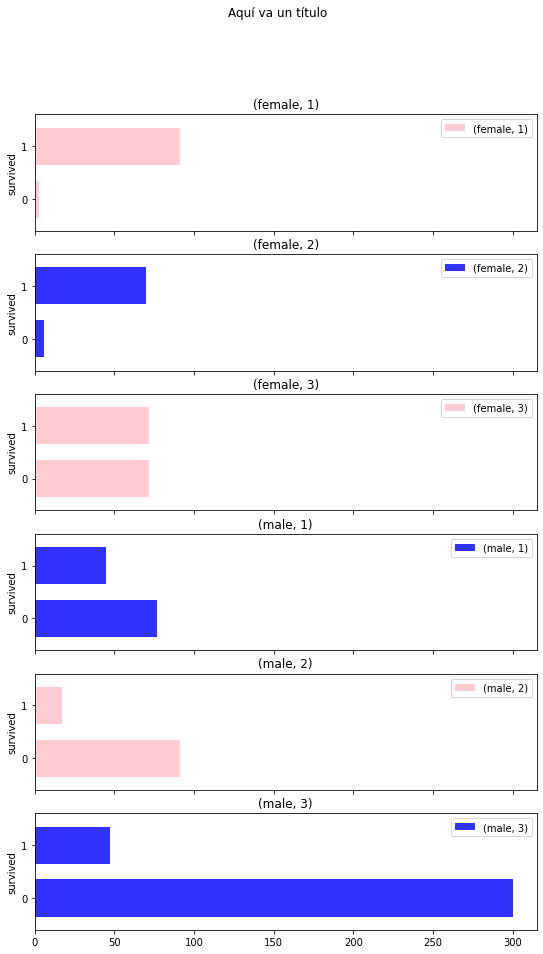

In [12]:
g1.plot(kind="barh",
        title="Aquí va un título",
        alpha=0.8,
        width=0.7,
        figsize=(9,15),
        subplots=True,
        color=["pink","blue"]); #ejecutamos de nuevo